# Basic experiment for deeplearning
> a tutorial about basic operations in deeplearning

- toc: true 
- badges: true
- comments: true
- sticky_rank: 3
- author: Bowen
- categories: [pytorch, fastai2]

In [1]:
from fastcore.basics import *
from fastai.vision.all import *
from fastai.torch_basics import *
set_seed(66)

In [2]:
aa = L(1,2,3)
aa
aa[2]

(#3) [1,2,3]

3

## common used type convert

In [3]:
# from list to tensor
aa2 = tensor(aa)
aa2
# convert to different device
to_device(aa2,'cpu')
to_device(aa2,'cuda:1')
aa2.cuda()
to_cpu(aa2)
# from tensor to list
aa3 = to_np(aa2)
aa3


tensor([1, 2, 3])

tensor([1, 2, 3])

tensor([1, 2, 3], device='cuda:1')

tensor([1, 2, 3], device='cuda:0')

tensor([1, 2, 3])

array([1, 2, 3])

In [4]:
TEST_IMAGE

'images/puppy.jpg'

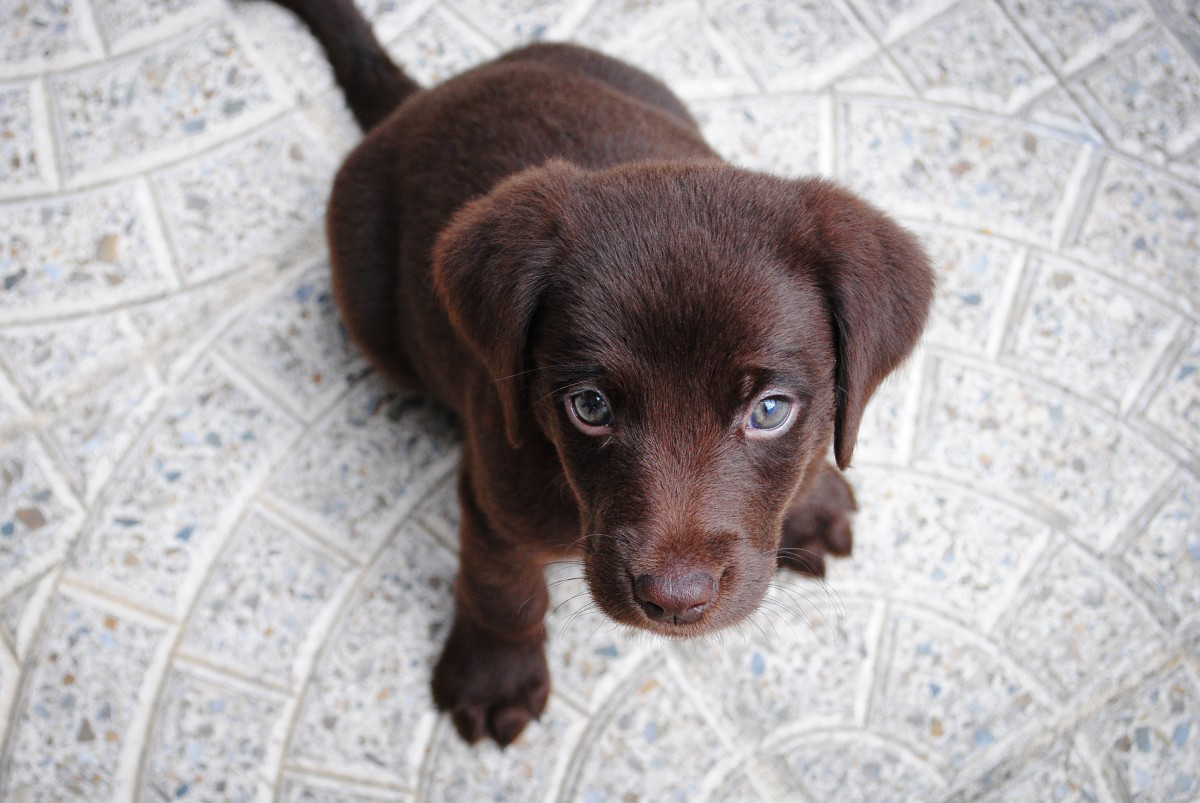

fastai.vision.core.PILImage

tensor([[[192, 195, 199,  ..., 140, 146, 152],
         [193, 195, 198,  ..., 142, 148, 153],
         [194, 194, 196,  ..., 146, 151, 155],
         ...,
         [160, 159, 161,  ..., 201, 206, 209],
         [158, 158, 161,  ..., 208, 213, 215],
         [156, 157, 160,  ..., 214, 218, 219]],

        [[191, 194, 198,  ..., 142, 148, 154],
         [192, 194, 197,  ..., 144, 150, 155],
         [193, 193, 195,  ..., 148, 153, 157],
         ...,
         [160, 159, 161,  ..., 201, 206, 209],
         [158, 158, 161,  ..., 208, 213, 215],
         [156, 157, 160,  ..., 214, 218, 219]],

        [[199, 200, 204,  ..., 154, 160, 166],
         [200, 202, 203,  ..., 156, 162, 167],
         [201, 201, 203,  ..., 160, 165, 169],
         ...,
         [162, 161, 163,  ..., 209, 216, 219],
         [160, 160, 163,  ..., 216, 223, 225],
         [158, 159, 162,  ..., 222, 228, 229]]], dtype=torch.uint8)

torch.Tensor

PIL.Image.Image

In [5]:
im = PILImage.create(TEST_IMAGE)
im
type(im)
tensorIm = image2tensor(im)
tensorIm
type(tensorIm)
im2 = to_image(tensorIm)
type(im2)

In [6]:
img1,img2 = TensorImage(torch.randn(16,16,3)),TensorImage(torch.randn(16,16,3))
# img1

In [7]:
img1.cuda()

TensorImage([[[ 2.1417e-01, -1.4337e-01, -2.6363e-01],
         [ 1.2033e+00,  1.0941e+00,  7.9602e-01],
         [ 4.4125e-03, -1.5482e+00, -1.1537e+00],
         [-1.6118e-01,  6.6759e-01, -4.9361e-01],
         [ 1.6012e+00,  1.3674e+00, -1.9543e+00],
         [ 4.2611e-02, -1.6858e+00, -3.3731e-01],
         [ 1.6615e+00,  4.1424e-01, -7.9143e-01],
         [ 2.2371e+00, -2.0260e-01,  1.0437e+00],
         [ 5.2461e-01, -2.2965e+00,  2.5833e-01],
         [-2.3315e+00, -3.6923e-01, -1.4560e+00],
         [ 7.2811e-01,  1.3429e+00, -1.5322e+00],
         [-5.8078e-01,  6.3740e-02, -2.4901e-01],
         [-1.4713e-01, -4.7707e-02,  6.8977e-01],
         [ 1.0987e+00,  2.3887e-01, -1.0462e-01],
         [-1.3440e-01, -9.1083e-01,  3.4476e-01],
         [-5.4032e-01,  5.3965e-01,  2.6260e-02]],

        [[-8.9216e-01, -5.8920e-02, -2.4062e-02],
         [-9.9328e-01, -4.1979e-01,  1.0098e+00],
         [-1.1005e+00,  2.8977e+00,  3.2093e-01],
         [-5.6141e-01,  1.1534e+00,  1.4350

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

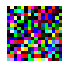

In [8]:
img1.show()

## draw a plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

<AxesSubplot:>

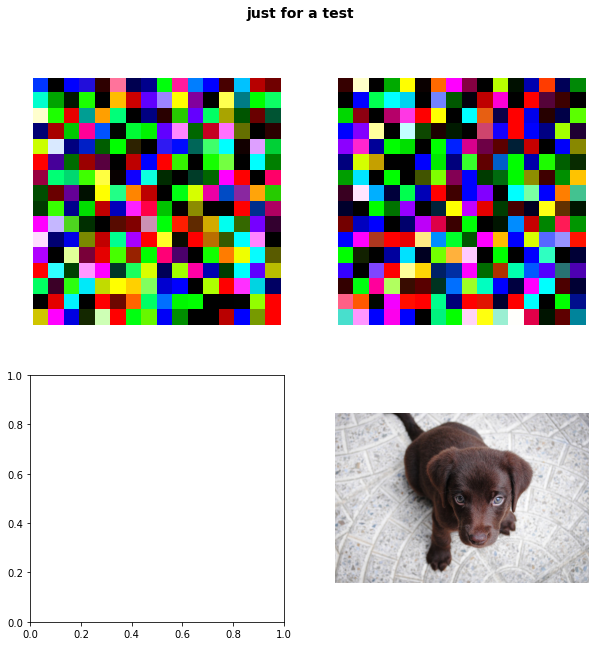

In [9]:
axs = get_grid(4,2,2,figsize=(10,10),title='just for a test')
# [i.set_axis_off() for i in axs]
img1.show(ctx=axs[1])
img2.show(ctx=axs[0])
im.show(ctx=axs[3])

## data augmentation in fastai

### 对角变换

In [10]:
DihedralItem

fastai.vision.augment.DihedralItem

fastai.vision.core.PILImage

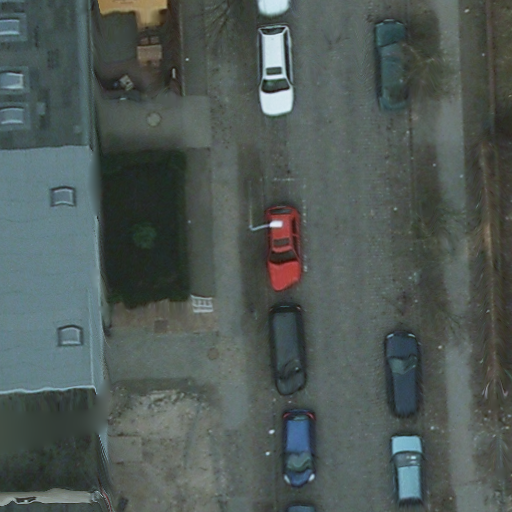

In [11]:
set_seed(105)
train_a_path = Path('/home/ubuntu/.fastai/data/isprs/haze/image')
label_a_path = Path('/home/ubuntu/.fastai/data/isprs/haze/label')
imgNames = get_image_files(train_a_path)
lblNames = get_image_files(label_a_path)
imgN = imgNames[random.randint(1,88)]
lblN = [random.randint(1,88)]
imgN = PILImage.create(imgN)
type(imgN)
imgN

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

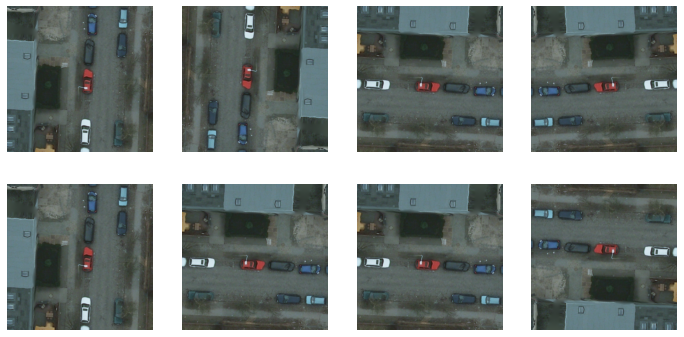

In [13]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    # p control the probability of the transform
    show_image(DihedralItem(p=1.)(imgN, split_idx=0), ctx=ax)

## training tricks